In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import VarianceThreshold

In [2]:
data = load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df['target'] = data['target'] # Target refers to the column that we will be predicting
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
#Data Dictionary

# CRIM: per capita crime rate by town.
# ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS: proportion of nonretail business acres per town.
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# NOX: nitric oxides concentration (parts per 10 million).
# RM: average number of rooms per dwelling.
# AGE: proportion of owner-occupied units built prior to 1940.
# DIS: weighted distances to five Boston employment centers.
# RAD: index of accessibility to radial highways.
# TAX: full-value property-tax rate per $10,000.
# PTRATIO: pupil-teacher ratio by town.
# B: 1000(Bk – 0.63)^2 where Bk is the proportion of blacks by town.
# LSTAT: % lower status of the population.
# MEDV: Median value of owner-occupied homes in $1000s. Target

In [6]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('target',axis=1),df['target'],test_size=0.2)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [7]:
x_train['is_NOX_high'] = np.where(x_train['NOX']>0.535,1,0)
x_test['is_NOX_high'] = np.where(x_test['NOX']>0.535,1,0)
x_train[['NOX','is_NOX_high']]

,NOX,is_NOX_high
24,0.538,1
306,0.472,0
290,0.411,0
99,0.445,0
464,0.655,1
...,...,...
375,0.671,1
247,0.431,0
110,0.520,0
38,0.499,0


In [8]:
mapper = x_train.groupby('CHAS')['CRIM'].mean().to_dict() # average crime rate per CHAS value
x_train['chas_avg_crim'] = x_train['CHAS'].map(mapper)
x_test['chas_avg_crim'] = x_test['CHAS'].map(mapper)

In [9]:
x_train['target'] = y_train # adding it again for demonstration of target encoding

target_mapper = x_train.groupby('CHAS')['target'].mean().to_dict()
x_train['avg_price_chas'] = x_train['CHAS'].map(target_mapper)
x_test['avg_price_chas'] = x_test['CHAS'].map(target_mapper)

In [10]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 24 to 186
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CRIM            404 non-null    float64
 1   ZN              404 non-null    float64
 2   INDUS           404 non-null    float64
 3   CHAS            404 non-null    float64
 4   NOX             404 non-null    float64
 5   RM              404 non-null    float64
 6   AGE             404 non-null    float64
 7   DIS             404 non-null    float64
 8   RAD             404 non-null    float64
 9   TAX             404 non-null    float64
 10  PTRATIO         404 non-null    float64
 11  B               404 non-null    float64
 12  LSTAT           404 non-null    float64
 13  is_NOX_high     404 non-null    int32  
 14  chas_avg_crim   404 non-null    float64
 15  target          404 non-null    float64
 16  avg_price_chas  404 non-null    float64
dtypes: float64(16), int32(1)
memory us

In [11]:
train=x_train.copy()
x_train=x_train.drop('target',axis=1)


# FEATURE SELECTION

### FILTER METHOD

##### 1. Dropping constant and quassi-constant features:

In [12]:
#Passing a value of zero for the parameter will filter all the features with zero variance
constant_filter = VarianceThreshold(threshold=0)
#we need to simply apply this filter to our training set as shown in the following example
constant_filter.fit(x_train)
#the number of non-constant features.
len(x_train.columns[constant_filter.get_support()])

16

In [13]:
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


##### 2.Removing duplicated features

In [14]:
# transpose the feature matrice
x_train_T = x_train.T
# print the number of duplicated features
print(x_train_T.duplicated().sum())
# select the duplicated features columns names
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


In [15]:
#There is no duplicate column present 
duplicated_columns

array([], dtype=object)

###### 3.Correlation Coefficient

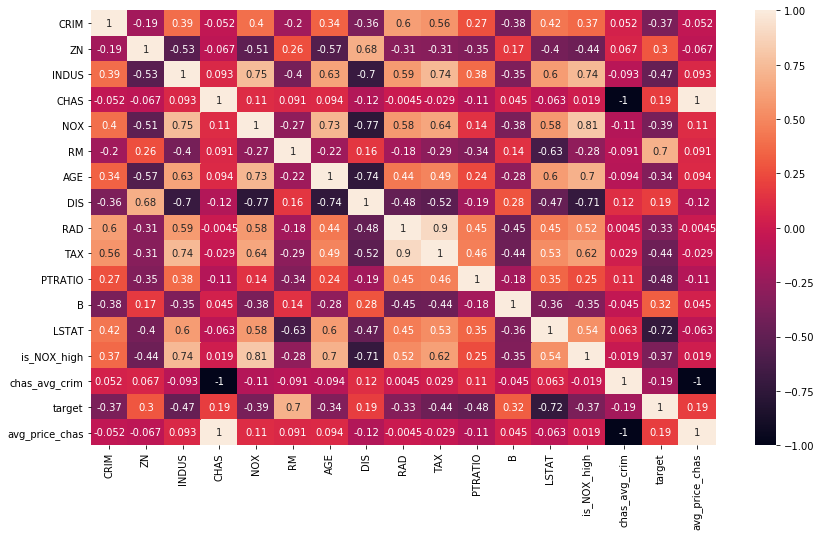

In [16]:
#visualisation
corr=train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

In [17]:
def handling_correlation(df,threshold=0.8):
    # creating set to hold the correlated features
    corr_features = set()
    # create the correlation matrix (default to pearson)
    corr_matrix = df.corr()
    #code for selecting all correleated features
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

In [18]:
#in the time of checking co-relation we have to check with target also that's why I am passing out output_label also
handling_correlation(train.copy(),0.85)

['chas_avg_crim', 'avg_price_chas', 'TAX']

In [19]:
#train_features contain all the columns of x_train except output_label
x_train_new=x_train.drop(['CHAS','TAX'],axis=1)
train=train.drop(['CHAS','TAX'],axis=1)

In [20]:
#let's check with the new x_train now
handling_correlation(x_train_new.copy(),0.85)

['avg_price_chas']

In [21]:
x_train_new=x_train.drop(['chas_avg_crim'],axis=1)
train=train.drop(['chas_avg_crim'],axis=1)

### 2. Wrapper method

You can follow this:
https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

##### a. Forward Feature Selection

In [22]:
def FFS(X,y):
    from mlxtend.feature_selection import SequentialFeatureSelector as SFS
    from sklearn.linear_model import LinearRegression
    # Sequential Forward Selection(sfs)
    sfs = SFS(LinearRegression(),
              k_features=8,
              forward=True,
              scoring = 'r2',
              cv = 5)
    """
    LinearRegression() is an estimator for the entire process. Similarly, it can be any classification based algorithm.

    k_features indicates the number of features to be selected. It can be any random value, but the optimal value can be found by analyzing and visualizing the scores for different numbers of features.

    we give forward=True if we want forward feature selection

    The scoring argument specifies the evaluation criterion to be used. For regression problems, there is only r2 score in default implementation. Similarly for classification, it can be accuracy, precision, recall, f1-score, etc.

    cv argument is for k-fold cross-validation. 

    """
    sfs.fit(X, y)#doing the FFS
    
    return sfs.k_feature_names_

In [23]:
x_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 24 to 186
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CRIM            404 non-null    float64
 1   ZN              404 non-null    float64
 2   INDUS           404 non-null    float64
 3   CHAS            404 non-null    float64
 4   NOX             404 non-null    float64
 5   RM              404 non-null    float64
 6   AGE             404 non-null    float64
 7   DIS             404 non-null    float64
 8   RAD             404 non-null    float64
 9   TAX             404 non-null    float64
 10  PTRATIO         404 non-null    float64
 11  B               404 non-null    float64
 12  LSTAT           404 non-null    float64
 13  is_NOX_high     404 non-null    int32  
 14  avg_price_chas  404 non-null    float64
dtypes: float64(14), int32(1)
memory usage: 68.9 KB


In [24]:
FFS(x_train_new,y_train)#features selected by FFS

('NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT', 'avg_price_chas')

### 3.EMBEDDED METHOD

Visit this for better understanding:
https://heartbeat.fritz.ai/hands-on-with-feature-selection-techniques-embedded-methods-84747e814dab

##### Tree-based Feature Importance

In [25]:
def tree_based_feature_importance(x_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

'\nNow you can choose top n features with higher feature importances.\n\n'

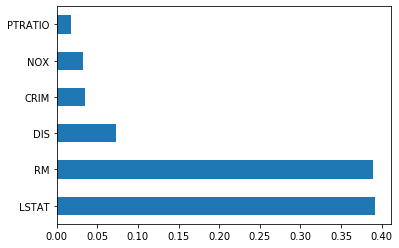

In [26]:
feature_importance=tree_based_feature_importance(x_train_new,y_train)#features importance data frame

"""
Now you can choose top n features with higher feature importances.

"""


In [27]:
display(feature_importance)

,Features,Importances
12,LSTAT,0.392184
5,RM,0.389790
7,DIS,0.073260
0,CRIM,0.034806
4,NOX,0.032447
10,PTRATIO,0.018132
9,TAX,0.017160
11,B,0.014232
6,AGE,0.013908
2,INDUS,0.005409


#### BONUS POINT:                                                                                                                                                                                       FIRST SELECT SET OF FEATURES USING FILTER METHOD AND THEN YOU CAN APPLY EMBEDDED METHOD ON THOSE  SELECTED FEATURES. WRAPPER METHODS ARE COMPUTATIONALLY EXPENSIVE , SO BETTER TO AVOID THAT.